# Figure 3c

This notebook loads the data and produces figure 3c. The intermediate files "figure3c_pricing.csv", "figure3c_ownership.csv", "figure3c_network.csv", and "figure3c_plug.csv" are saved here and reloaded to be used for the figure. You can reproduce the figure starting from that point in the code by downloading the files from our data repository. 

In [1]:
savedate = '20251021'

In [5]:
data_path = ''  # path to data - not needed for you to rerun figure
figure_data_path = '' # save the data from the data repository here in a subfolder called "FigureData"
figure_path = '' # path to Figures folder

In [3]:
import pandas as pd
import geopandas as geopd
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
import matplotlib
matplotlib.rcParams['font.family'] = 'Arial'

# Load and process data

In [6]:
station_level = pd.read_csv(data_path + '20d_level_stations_US_compiled_250415_wlabels.zip')

print(len(station_level[~station_level['EV Pricing'].isna()]) / len(station_level))
print(len(station_level[~station_level['Owner Type Code'].isna()]) / len(station_level))

# Cluster mappings
cluster_order_numbers8_v3 = [1, 3, 5, 2, 6, 7, 4, 0]
cluster_paper_to_kmeans_map = {i+1:j for i, j in enumerate(cluster_order_numbers8_v3)}
cluster_kmeans_to_paper_map = {j:i for i, j in cluster_paper_to_kmeans_map.items()}

# Pricing
station_level['free_label'] = False
station_level.loc[station_level.loc[(station_level['EV Pricing'].str.contains('free'))|(station_level['EV Pricing'].str.contains('Free'))].index, 'free_label'] = True
station_level.loc[station_level[station_level['EV Pricing'].isna()].index, 'free_label'] = 'Missing'
plotdf_pricing = pd.DataFrame(station_level.groupby('Kmeans_nc8')['free_label'].value_counts(normalize=True))
# station_level[~station_level['EV Pricing'].isna()].groupby('Kmeans_nc8')['free_label'].value_counts(normalize=True).sort_values()

# Ownership
station_level['owner_label'] = 'Other'
station_level.loc[station_level[station_level['Owner Type Code']=='P'].index, 'owner_label'] = 'Private'
station_level.loc[station_level[station_level['Owner Type Code'].isna()].index, 'owner_label'] = 'Missing'
plotdf_owner = pd.DataFrame(station_level.groupby('Kmeans_nc8')['owner_label'].value_counts(normalize=True))
# tmp[~tmp['Owner Type Code'].isna()].groupby('Kmeans_nc8')['owner_label'].value_counts(normalize=True).sort_values()

# Network
station_level['tesla_label'] = False
station_level.loc[station_level[station_level['EV Network'].isin(['Tesla', 'Tesla Destination'])].index, 'tesla_label'] = True
station_level.loc[station_level[station_level['EV Network'].isna()].index, 'tesla_label'] = 'Missing'
plotdf_network = pd.DataFrame(station_level.groupby('Kmeans_nc8')['tesla_label'].value_counts(normalize=True))

# DC
station_level['no_stations'] = station_level[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].sum(axis=1)
station_level[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']] = station_level[['EV Level1 EVSE Num', 'EV Level2 EVSE Num', 'EV DC Fast Count']].fillna(0)
station_level['dc_mix_label'] = 'Mixed'
station_level.loc[station_level[station_level['EV DC Fast Count']==station_level['no_stations']].index, 'dc_mix_label'] = 'All DC'
station_level.loc[station_level[station_level['EV DC Fast Count']==0].index, 'dc_mix_label'] = 'No DC'
plotdf_dc = pd.DataFrame(station_level.groupby('Kmeans_nc8')['dc_mix_label'].value_counts(normalize=True))

/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_36678/3092571744.py:1: DtypeWarning: Columns (7,17,39) have mixed types. Specify dtype option on import or set low_memory=False.
  station_level = pd.read_csv(data_path + '20d_level_stations_US_compiled_250415_wlabels.zip')


0.24485428127142309
0.28809336699717425


/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_36678/3092571744.py:14: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Missing' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  station_level.loc[station_level[station_level['EV Pricing'].isna()].index, 'free_label'] = 'Missing'
/var/folders/x0/47mhggk13ms4ct1vkkn6b88r0000gs/T/ipykernel_36678/3092571744.py:28: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Missing' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  station_level.loc[station_level[station_level['EV Network'].isna()].index, 'tesla_label'] = 'Missing'


## Save and reload 
Then the following plotting script can be run by anyone using the posted data.

We add "paper_cluster_labels" before saving so that the numbering in the saved data matches that of the paper. 

In [7]:
# Save
## Pricing
plotdf_pricing['paper_cluster_labels'] = plotdf_pricing.index.get_level_values('Kmeans_nc8').map(cluster_kmeans_to_paper_map)
plotdf_pricing = plotdf_pricing.set_index('paper_cluster_labels', append=True)
plotdf_pricing = plotdf_pricing.reorder_levels(['paper_cluster_labels', 'Kmeans_nc8', 'free_label'])
plotdf_pricing.to_csv(figure_data_path + 'FigureData/figure3c_pricing.csv')

## Ownership
plotdf_owner['paper_cluster_labels'] = plotdf_owner.index.get_level_values('Kmeans_nc8').map(cluster_kmeans_to_paper_map)
plotdf_owner = plotdf_owner.set_index('paper_cluster_labels', append=True)
plotdf_owner = plotdf_owner.reorder_levels(['paper_cluster_labels', 'Kmeans_nc8', 'owner_label'])
plotdf_owner.to_csv(figure_data_path + 'FigureData/figure3c_ownership.csv')

## Network
plotdf_network['paper_cluster_labels'] = plotdf_network.index.get_level_values('Kmeans_nc8').map(cluster_kmeans_to_paper_map)
plotdf_network = plotdf_network.set_index('paper_cluster_labels', append=True)
plotdf_network = plotdf_network.reorder_levels(['paper_cluster_labels', 'Kmeans_nc8', 'tesla_label'])
plotdf_network.to_csv(figure_data_path + 'FigureData/figure3c_network.csv')

## DC
plotdf_dc['paper_cluster_labels'] = plotdf_dc.index.get_level_values('Kmeans_nc8').map(cluster_kmeans_to_paper_map)
plotdf_dc = plotdf_dc.set_index('paper_cluster_labels', append=True)
plotdf_dc = plotdf_dc.reorder_levels(['paper_cluster_labels', 'Kmeans_nc8', 'dc_mix_label'])
plotdf_dc.to_csv(figure_data_path + 'FigureData/figure3c_plug.csv')

### Run from here if reloading data

In [8]:
# Reload
plotdf_pricing = pd.read_csv(figure_data_path + 'FigureData/figure3c_pricing.csv', index_col=['Kmeans_nc8', 'free_label'])[['proportion']]
plotdf_owner = pd.read_csv(figure_data_path + 'FigureData/figure3c_ownership.csv', index_col=['Kmeans_nc8', 'owner_label'])[['proportion']]
plotdf_network = pd.read_csv(figure_data_path + 'FigureData/figure3c_network.csv', index_col=['Kmeans_nc8', 'tesla_label'])[['proportion']]
plotdf_dc = pd.read_csv(figure_data_path + 'FigureData/figure3c_plug.csv', index_col=['Kmeans_nc8', 'dc_mix_label'])[['proportion']]

# Plot

In [9]:
colours_dict8_v3 = {1:'#006837', 
                    3:'#1a9850',
                    5:'#a6d96a',
                    2:'#fdae61',
                    6:'#f46d43',
                    7:'#cb181d',
                    4:'#df65b0',
                    0:'#8073ac'}

colours_dict8_v3['Missing'] = 'lightgrey'

In [10]:
def plot_access_shares(plotdf, axes, truelabel='True', falselabel='False', ylabel=False, 
                       case1=False, case2=False, multikeys=[], legend_title=None, loc='upper left'):
    
    if case1:
        hatches={'Private':'//', 'Other':None, 'Missing':None}
        alphas={'Private':1.0, 'Other':0.5, 'Missing':1}
        bottom = np.zeros((8,))
        for key in multikeys:
            if key == 'Missing':
                vals1 = np.array([plotdf.loc[k].loc[key, 'proportion'] for k in cluster_order_numbers8_v3])
                axes.bar(np.arange(1, 9), vals1, color='lightgrey', bottom=bottom, label=key, alpha=alphas[key], hatch=hatches[key])
                
            else:
                vals1 = np.array([plotdf.loc[k].loc[key, 'proportion'] for k in cluster_order_numbers8_v3])
                axes.bar(np.arange(1, 9), vals1, color=[colours_dict8_v3[k] for k in cluster_order_numbers8_v3], bottom=bottom, label=key, alpha=alphas[key], hatch=hatches[key])
                bottom += vals1
                
    elif case2:
        hatches={'All DC':'//', 'No DC':None, 'Mixed':'...', 'Missing':None}
        alphas={'All DC':1.0, 'No DC':0.5, 'Mixed':0.75, 'Missing':1}
        bottom = np.zeros((8,))
        for key in multikeys:
            if key == 'Missing':
                vals1 = np.array([plotdf.loc[k].loc[key, 'proportion'] for k in cluster_order_numbers8_v3])
                axes.bar(np.arange(1, 9), vals1, color='lightgrey', bottom=bottom, label=key, alpha=alphas[key], hatch=hatches[key])
                
            else:
                vals1 = np.array([plotdf.loc[k].loc[key, 'proportion'] for k in cluster_order_numbers8_v3])
                axes.bar(np.arange(1, 9), vals1, color=[colours_dict8_v3[k] for k in cluster_order_numbers8_v3], bottom=bottom, label=key, alpha=alphas[key], hatch=hatches[key])
                bottom += vals1
        
    else:
        vals1 = [pd.DataFrame(plotdf).loc[k].loc['True', 'proportion'] for k in cluster_order_numbers8_v3]
        axes.bar(np.arange(1, 9), vals1, color=[colours_dict8_v3[k] for k in cluster_order_numbers8_v3], hatch='//', label=truelabel)
        
        vals2 = [pd.DataFrame(plotdf).loc[k].loc['False', 'proportion'] for k in cluster_order_numbers8_v3]
        axes.bar(np.arange(1, 9), vals2, bottom=vals1, color=[colours_dict8_v3[k] for k in cluster_order_numbers8_v3], alpha=0.5, label=falselabel)
        
        missing_data = pd.DataFrame(plotdf).xs('Missing', level=pd.DataFrame(plotdf).index.names[1])
        vals3 = [missing_data.loc[k, 'proportion'] if k in missing_data.index else 0 for k in cluster_order_numbers8_v3]#[pd.DataFrame(plotdf).loc[k].loc['Missing', 'proportion'] if 'Missing' in pd.DataFrame(plotdf).loc[k].index else 0 for k in cluster_order_numbers8_v3]
        axes.bar(np.arange(1, 9), np.array(vals3), bottom=np.array(vals1)+np.array(vals2), color='lightgrey', alpha=1, label='Missing')
    
    axes.legend(title=legend_title, fontsize=8, title_fontsize=8, loc=loc)

    axes.set_xlabel('Cluster Number')
    if ylabel:
        axes.set_ylabel('Share of Stations')
    axes.set_xticks(np.arange(1, 9))
    
    return axes

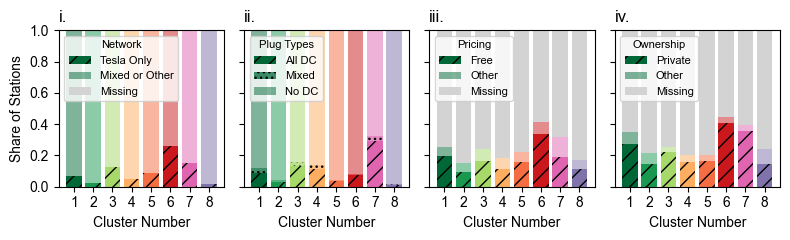

In [11]:
fig, ax = plt.subplots(1, 4, figsize=(8, 2.5), sharey=True)

ax[0] = plot_access_shares(plotdf_network, ax[0], truelabel='Tesla Only', falselabel='Mixed or Other', ylabel=True, legend_title='Network')
ax[1] = plot_access_shares(plotdf_dc, ax[1], case2=True, multikeys=['All DC', 'Mixed', 'No DC'], legend_title='Plug Types')
ax[2] = plot_access_shares(plotdf_pricing, ax[2], truelabel='Free', falselabel='Other', legend_title='Pricing', loc='upper left')
ax[3] = plot_access_shares(plotdf_owner, ax[3], case1=True, multikeys=['Private', 'Other', 'Missing'], legend_title='Ownership')#, 'Other'])

counter = ['i', 'ii', 'iii', 'iv']
for i in range(4):
    ax[i].set_title(counter[i]+'.', loc='left')

plt.tight_layout()
plt.savefig(figure_path + 'Figures/figure3c_access_'+savedate+'.pdf', bbox_inches='tight')
plt.savefig(figure_path + 'Figures/figure3c_access_'+savedate+'.png', bbox_inches='tight', dpi=400)
plt.show()